<a href="https://colab.research.google.com/github/YeiferKmac/MetodosComputacionales2-G02/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
from scipy.signal import find_peaks, peak_widths


def datos_prueba(t_max:float, dt:float, amplitudes:NDArray[float],
  frecuencias:NDArray[float], ruido:float=0.0) -> NDArray[float]:
  ts = np.arange(0.,t_max,dt)
  ys = np.zeros_like(ts,dtype=float)
  for A,f in zip(amplitudes,frecuencias):
    ys += A*np.sin(2*np.pi*f*ts)
    ys += np.random.normal(loc=0,size=len(ys),scale=ruido) if ruido else 0
  return ts,ys


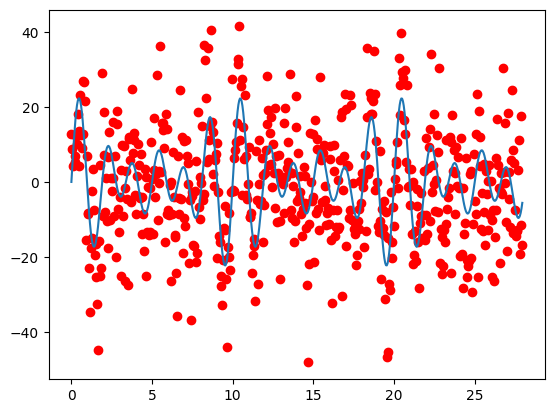

In [50]:
t1,y1 = datos_prueba(28,0.05,[7,10,6],[0.5,0.6,0.4],ruido=7)
t2,y2 = datos_prueba(28,0.05,[7,10,6],[0.5,0.6,0.4])
y2=y2
plt.scatter(t1,y1,color="r")
plt.plot(t2,y2)


In [51]:
def Fourier(t:NDArray[float], y:NDArray[float],
 f:NDArray[float]) -> NDArray[complex]:
    N = len(y)
    result = np.zeros(len(f), dtype=complex)
    for k in range(N):
        result += y[k]*np.exp(-2j * np.pi * t[k] * f)
    return result

In [52]:
# Definimos las frecuencias a analizar
frecuencias_analisis = np.array(np.linspace(0.1,5,1000))
# Transformada de Fourier de las señales
ft_sin_ruido = Fourier(t2, y2, frecuencias_analisis)
ft_con_ruido = Fourier(t1, y1, frecuencias_analisis)


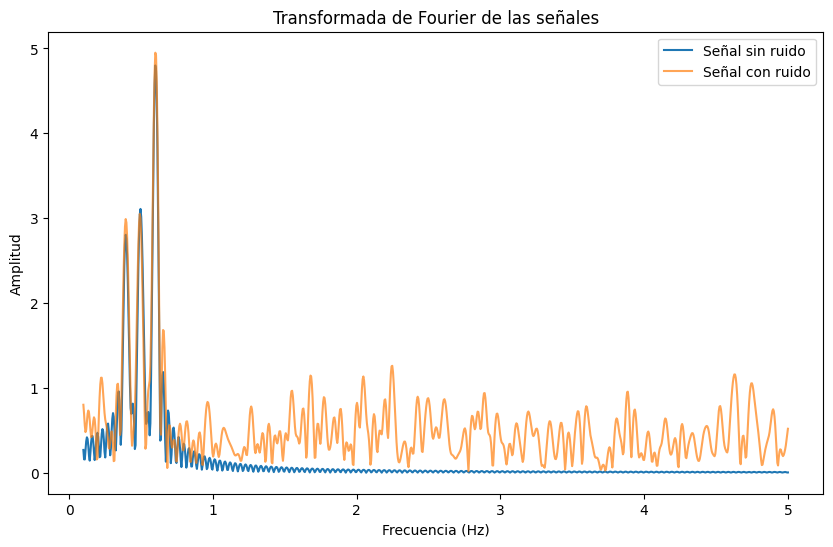

In [53]:
# Gráfico de las señales
plt.figure(figsize=(10, 6))
plt.plot(frecuencias_analisis, np.abs(ft_sin_ruido)/len(y1), label='Señal sin ruido')
plt.plot(frecuencias_analisis, np.abs(ft_con_ruido)/len(y1), label='Señal con ruido', alpha=0.7)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Transformada de Fourier de las señales')
plt.savefig("1.a.pdf")
plt.show()

In [54]:
print("1.a) Mantiene claro los picos, sin afectar mucho la señal")

1.a) Mantiene claro los picos, sin afectar mucho la señal


Text(0.5, 1.0, 'Transformada de Fourier de las señales')

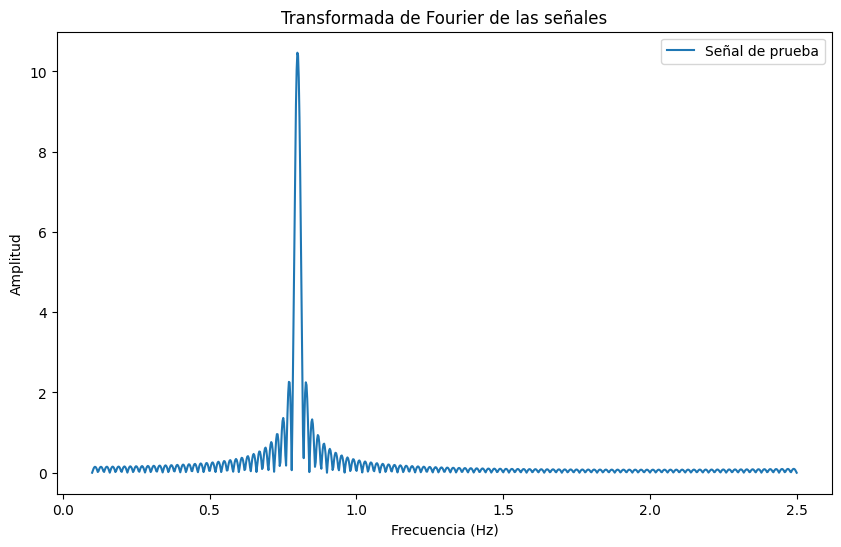

In [151]:
t3,y3 = datos_prueba(50,0.25,[21],[0.8])
frecuencias_analisis = np.array(np.linspace(0.1,2.5,1000))
ft_prueba = Fourier(t3, y3, frecuencias_analisis)
plt.figure(figsize=(10, 6))
plt.plot(frecuencias_analisis, np.abs(ft_prueba)/len(y3), label='Señal de prueba')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Transformada de Fourier de las señales')


In [159]:
len(frecuencias_analisis)


200

In [164]:
# Encontramos los picos en la transformada sin ruido
peaks, properties = find_peaks(np.abs(ft_prueba)/len(y3), height=4 )

"""widht = peak_widths(1/np.abs(ft_prueba)*len(y3),peaks,rel_height=0.5)
widht = widht[0]
widht"""


# Calculamos el FWHM


# Mostramos el FWHM
#print(f'FWHM del pico: {results_half[0]}')

1000

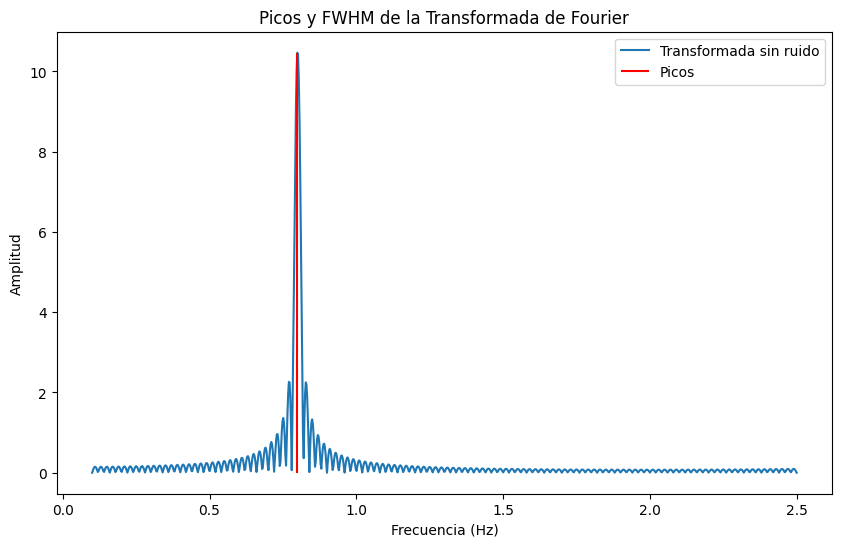

In [154]:
# Graficamos el FWHM
plt.figure(figsize=(10, 6))
plt.plot(frecuencias_analisis, np.abs(ft_prueba)/len(y3), label='Transformada sin ruido')
plt.vlines(frecuencias_analisis[peaks], 0, np.abs(ft_prueba)[peaks]/len(y3), color='r', label='Picos')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Picos y FWHM de la Transformada de Fourier')
plt.show()

In [102]:
"""
fwhm_values = []
t_max = np.linspace(10, 300,50)  # valores de t_max entre 10 y 300 segundos

for i in t_max:
    t,_=datos_prueba(i,0.25,)
    ft_prueba = Fourier(t, y3, frecuencias_analisis)
    peaks, _ = find_peaks(np.abs(ft_prueba)/len(y3))
    results_half = peak_widths(np.abs(ft_prueba)/len(y3), peaks, rel_height=0.5)
    
    fwhm_values.append(results_half[0][0])

# Graficamos FWHM vs t_max
plt.figure(figsize=(10, 6))
plt.loglog(t_max, fwhm_values, label='FWHM vs t_max')
plt.xlabel('t_max (s)')
plt.ylabel('FWHM (Hz)')
plt.title('FWHM en función del intervalo de tiempo (log-log)')
plt.grid(True)
plt.show()
"""

"\nfwhm_values = []\nt_max = np.linspace(10, 300,50)  # valores de t_max entre 10 y 300 segundos\n\nfor i in t_max:\n    t,_=datos_prueba(i,0.25,)\n    ft_prueba = Fourier(t, y3, frecuencias_analisis)\n    peaks, _ = find_peaks(np.abs(ft_prueba)/len(y3))\n    results_half = peak_widths(np.abs(ft_prueba)/len(y3), peaks, rel_height=0.5)\n    \n    fwhm_values.append(results_half[0][0])\n\n# Graficamos FWHM vs t_max\nplt.figure(figsize=(10, 6))\nplt.loglog(t_max, fwhm_values, label='FWHM vs t_max')\nplt.xlabel('t_max (s)')\nplt.ylabel('FWHM (Hz)')\nplt.title('FWHM en función del intervalo de tiempo (log-log)')\nplt.grid(True)\nplt.show()\n"